In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sl
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from numpy import ndarray
from sklearn import metrics
regr=linear_model.LinearRegression()

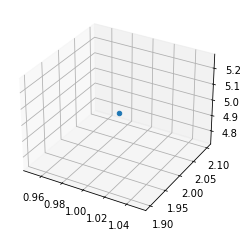

In [3]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
import math
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(1,2,5)

In [4]:
RBF=np.zeros((100,10,5))
R=np.zeros((100,5))
diff_xx_R=np.zeros((100,5))
diff_yy_R=np.zeros((100,5))
diff_xx_RBF=np.zeros((100,10,5))
diff_xx_solution=np.zeros((100,100))
diff_yy_RBF=np.zeros((100,10,5))
diff_yy_solution=np.zeros((100,100))
xy=np.zeros((20,5))
g2=0
f=0
sf=np.zeros((2,1))

In [5]:
neigh_x=np.zeros((100,10,1))
neigh_y=np.zeros((100,10,1))
solution=np.zeros((100,100))
solution_z=np.zeros((100,10,1))
diff_xx_solution_z=np.zeros((100,10,1))
diff_yy_solution_z=np.zeros((100,10,1))
diff_solution=np.zeros((100,100))
exact_solution=np.zeros((100,100))
val=np.zeros((1,5))
e_val=np.zeros((20,1))
e=0
z1=0
H=np.zeros((20,1))
error=np.zeros((100,100))
error2=np.zeros((100,100))
error3=np.zeros((100,100))
ss=np.zeros((1,5))
f=np.zeros((1,5))
sol=0
dif=0
g2=0
coef=np.zeros((5))
t=0.05


In [6]:
G1=np.zeros((4,100,11))
G1[0,:,0]=np.random.rand(100)*10
G1[1,:,0]=np.random.rand(100)*10

In [7]:
for i in range(0,20):
    for j in range(0,100):   
        z=0
        for k in range(0,100):           
                if (((G1[0,j,0]-G1[0,k,0])**2+(G1[1,j,0]-G1[1,k,0])**2)<8**2)&(z<10)&(j!=k):
                    neigh_x[j,z,0]=G1[0,k,0]
                    neigh_y[j,z,0]=G1[1,k,0] 
                    if i!=0 and i!=1:
                        solution_z[j,z,0]=solution[k,i]
                    z=z+1
                    if z==10:
                         break   

        if z<10:
            print('we need more points')
        for z in range(0,10):
                RBF[j,z,0]=((G1[0,j,0]-neigh_x[j,z,0])**2+(G1[1,j,0]-neigh_y[j,z,0])**2+0.22**2)**(0.5)
                if z==0:
                    RBF[j,0,1]=((G1[0,j,0]-neigh_x[j,0,0])**2+(G1[1,j,0]-neigh_y[j,0,0])**2+0.22**2)**(0.5)
                if z!=0:
                    RBF[j,z,1]=((neigh_x[j,0,0]-neigh_x[j,z,0])**2+(neigh_y[j,0,0]-neigh_y[j,z,0])**2+0.22**2)**(0.5)
                if z==5:
                    RBF[j,z,2]=((neigh_x[j,5,0]-G1[0,j,0])**2+(neigh_y[j,5,0]-G1[1,j,0])**2+0.22**2)**0.5
                if z!=5:
                    RBF[j,z,2]=((neigh_x[j,5,0]-neigh_x[j,z,0])**2+(neigh_y[j,5,0]-neigh_y[j,z,0])**2+0.22**2)**0.5  
                if z==9:
                    RBF[j,z,3]=((neigh_x[j,9,0]-G1[0,j,0])**2+(neigh_y[j,9,0]-G1[1,j,0])**2+0.22**2)**0.5
                if z!=9:
                    RBF[j,z,3]=((neigh_x[j,9,0]-neigh_x[j,z,0])**2+(neigh_y[j,9,0]-neigh_y[j,z,0])**2+0.22**2)**0.5 
                if z==2:
                    RBF[j,z,4]=((neigh_x[j,2,0]-G1[0,j,0])**2+(neigh_y[j,2,0]-G1[1,j,0])**2+0.22**2)**0.5
                if z!=2:
                    RBF[j,z,4]=((neigh_x[j,2,0]-neigh_x[j,z,0])**2+(neigh_y[j,2,0]-neigh_y[j,z,0])**2+0.22**2)**0.5
                if i==0 or i==1:
                    solution[j,i]=math.sin(G1[0,j,0])*math.sin(G1[1,j,0])
                    solution_z[j,z,0]=math.sin(G1[0,k,0])*math.sin(G1[1,k,0])
                    diff_xx_solution_z[j,z,0]=-math.sin(G1[0,k,0])*math.sin(G1[1,k,0])
                    diff_yy_solution_z[j,z,0]=-math.sin(G1[0,k,0])*math.sin(G1[1,k,0])
                
        if i!=0 and i!=1:            
            regr.fit(RBF[j,:,:],solution_z[j,:,0]) 
            R[j,1]=((G1[0,j,0]-neigh_x[j,0,0])**2+(G1[1,j,0]-neigh_y[j,0,0])**2+0.22**2)**(0.5)
            diff_xx_R[j,1]=-0.25*((G1[0,j,0]-neigh_x[j,0,0])**2+(G1[1,j,0]-neigh_y[j,0,0])**2+0.22**2)**-1.5*4*(G1[0,j,0]-neigh_x[j,0,0])**2+0.5*((G1[0,j,0]-neigh_x[j,0,0])**2+(G1[1,j,0]-neigh_y[j,0,0])**2+0.22**2)**(-0.5)*2                                                                   
            diff_yy_R[j,1]=-0.25*((G1[0,j,0]-neigh_x[j,0,0])**2+(G1[1,j,0]-neigh_y[j,0,0])**2+0.22**2)**-1.5*4*(G1[1,j,0]-neigh_y[j,0,0])**2+0.5*((G1[0,j,0]-neigh_x[j,0,0])**2+(G1[1,j,0]-neigh_y[j,0,0])**2+0.22**2)**-(0.5)*2                                                                                                                                                                                                                                                                                            
            R[j,2]=((neigh_x[j,5,0]-G1[0,j,0])**2+(neigh_y[j,5,0]-G1[1,j,0])**2+0.22**2)**0.5
            diff_xx_R[j,2]=-0.25*((G1[0,j,0]-neigh_x[j,5,0])**2+(G1[1,j,0]-neigh_y[j,5,0])**2+0.22**2)**-1.5*4*(G1[0,j,0]-neigh_x[j,5,0])**2+0.5*((G1[0,j,0]-neigh_x[j,5,0])**2+(G1[1,j,0]-neigh_y[j,5,0])**2+0.22**2)**(-0.5)*2                                                                   
            diff_yy_R[j,2]=-0.25*((G1[0,j,0]-neigh_x[j,5,0])**2+(G1[1,j,0]-neigh_y[j,5,0])**2+0.22**2)**-1.5*4*(G1[1,j,0]-neigh_y[j,5,0])**2+0.5*((G1[0,j,0]-neigh_x[j,5,0])**2+(G1[1,j,0]-neigh_y[j,5,0])**2+0.22**2)**-(0.5)*2                                                                                                                                                                                                                                                                                
            R[j,3]=((neigh_x[j,9,0]-G1[0,j,0])**2+(neigh_y[j,9,0]-G1[1,j,0])**2+0.22**2)**0.5
            diff_xx_R[j,3]=-0.25*((G1[0,j,0]-neigh_x[j,9,0])**2+(G1[1,j,0]-neigh_y[j,9,0])**2+0.22**2)**-1.5*4*(G1[0,j,0]-neigh_x[j,9,0])**2+0.5*((G1[0,j,0]-neigh_x[j,9,0])**2+(G1[1,j,0]-neigh_y[j,9,0])**2+0.22**2)**(-0.5)*2                                                                   
            diff_yy_R[j,3]=-0.25*((G1[0,j,0]-neigh_x[j,9,0])**2+(G1[1,j,0]-neigh_y[j,9,0])**2+0.22**2)**-1.5*4*(G1[1,j,0]-neigh_y[j,9,0])**2+0.5*((G1[0,j,0]-neigh_x[j,9,0])**2+(G1[1,j,0]-neigh_y[j,9,0])**2+0.22**2)**-(0.5)*2                                                                                                                                                                                                                                                                                
            R[j,4]=((neigh_x[j,2,0]-G1[0,j,0])**2+(neigh_y[j,2,0]-G1[1,j,0])**2+0.22**2)**0.5
            diff_xx_R[j,4]=-0.25*((G1[0,j,0]-neigh_x[j,2,0])**2+(G1[1,j,0]-neigh_y[j,2,0])**2+0.22**2)**-1.5*4*(G1[0,j,0]-neigh_x[j,2,0])**2+0.5*((G1[0,j,0]-neigh_x[j,2,0])**2+(G1[1,j,0]-neigh_y[j,2,0])**2+0.22**2)**(-0.5)*2                                                                   
            diff_yy_R[j,4]=-0.25*((G1[0,j,0]-neigh_x[j,2,0])**2+(G1[1,j,0]-neigh_y[j,2,0])**2+0.22**2)**-1.5*4*(G1[1,j,0]-neigh_y[j,2,0])**2+0.5*((G1[0,j,0]-neigh_x[j,2,0])**2+(G1[1,j,0]-neigh_y[j,2,0])**2+0.22**2)**-(0.5)*2                                                                                                                                                                                                                                                                                
            coef[:] =regr.score(RBF[j,:,:],solution_z[j,:,0])  
            diff_xx_solution[j,i]=coef[1]*diff_xx_R[j,1]+coef[2]*diff_xx_R[j,2]+coef[3]*diff_xx_R[j,3]+coef[4]*diff_xx_R[j,4]
            diff_yy_solution[j,i]=coef[1]*diff_yy_R[j,1]+coef[2]*diff_yy_R[j,2]+coef[3]*diff_yy_R[j,3]+coef[4]*diff_yy_R[j,4]
        if i!=0:
            solution[j,(i+1)]=+2*solution[j,i]-solution[j,i-1]+t**2*(-2/t*(solution[j,i]-solution[j,i-1])-solution[j,i]+diff_xx_solution[j,i]+diff_yy_solution[j,i]+2*math.sin(G1[0,j,0])*math.sin(G1[1,j,0])*(math.cos((i)*t)-math.sin((i)*t)))
            error3[j,i+1]=abs(solution[j,(i+1)]-math.cos((i+1)*t)*math.sin(G1[0,j,0])*math.sin(G1[1,j,0]))**2
        
        
        

In [8]:
for i in range(0,20):
    e=0
    for j in range(0,100):
        e=e+error3[j,i]
    print(e/100)
    #print(np.max(error3[i,:]))

0.0
0.0
1.414393132971335e-05
9.652291865356287e-05
0.00035675280942494477
0.0009408978096308029
0.0020136917263789736
0.0037443935519569016
0.006296007175245631
0.009817284413245682
0.01443702389421748
0.020260256649322197
0.027365974858358174
0.03580611505564638
0.04560555297836824
0.056762905627491894
0.06925196828090247
0.0830236412192407
0.09800822369277638
0.11411797191894482


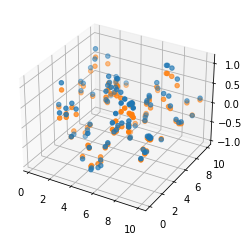

In [9]:
xx=np.zeros((100))
yy=np.zeros((100))
zz=np.zeros((100))
ee=np.zeros((100))
d=0
for j in range(0,100):
    xx[d]=G1[0,j,0]
    yy[d]=G1[1,j,0]
    zz[d]=solution[j,10]
    ee[d]=math.cos(10*t)*math.sin(G1[0,j,0])*math.sin(G1[1,j,0])
    d=d+1
fig=plt.figure()
ax=plt.axes(projection="3d")
predict=regr.predict(xy)
ax.scatter(xx,yy,zz)
ax.scatter(xx,yy,ee)
plt.show()

       

In [10]:
print(coef)


[0.69082911 0.69082911 0.69082911 0.69082911 0.69082911]
